In [27]:
pip install dash

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np

# Generating dates from 1979 to 2021 with monthly intervals (using 'MS' for month start frequency)
date_range = pd.date_range(start="1979-01", end="2021-12", freq='MS')

# Assigning recession periods based on the description
def assign_recession(year, month):
    if (year == 1980) or (1981 <= year <= 1982) or (year == 1991) or (2000 <= year <= 2001) or \
       (2007 <= year <= 2009) or (year == 2020 and 2 <= month <= 4):
        return 1
    else:
        return 0

# Creating a synthetic dataset
np.random.seed(0)  # for reproducibility
data = {
    'Date': date_range,
    'Recession': [assign_recession(d.year, d.month) for d in date_range],
    'Automobile_Sales': np.random.randint(1000, 10000, size=len(date_range)),
    'GDP': np.random.uniform(20000, 60000, size=len(date_range)),
    'Unemployment_Rate': np.random.uniform(3, 15, size=len(date_range)),
    'Consumer_Confidence': np.random.uniform(50, 150, size=len(date_range)),
    'Seasonality_Weight': np.random.uniform(0.8, 1.2, size=len(date_range)),
    'Price': np.random.uniform(15000, 45000, size=len(date_range)),
    'Advertising_Expenditure': np.random.uniform(50000, 200000, size=len(date_range)),
    'Vehicle_Type': np.random.choice(['Supperminicar', 'Smallfamiliycar', 'Mediumfamilycar', 
                                      'Executivecar', 'Sports'], size=len(date_range)),
    'Competition': np.random.randint(1, 10, size=len(date_range)),
    'Month': date_range.month,
    'Year': date_range.year
}

# Creating the DataFrame
df = pd.DataFrame(data)



<Axes: title={'center': 'Yearly Automobile Sales'}, xlabel='Year'>

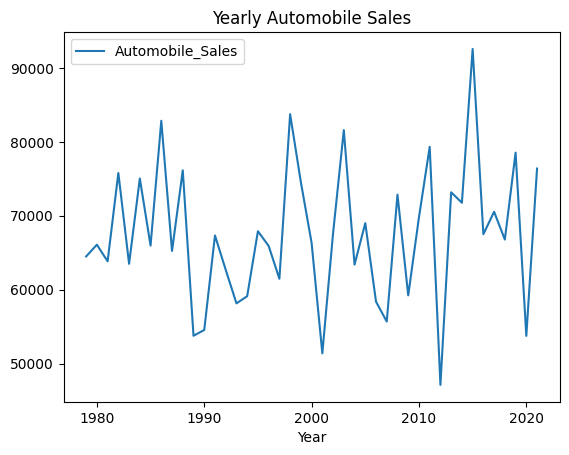

In [29]:
# Grouping by Year to plot annual sales
df_yearly = df.groupby('Year')['Automobile_Sales'].sum().reset_index()

# Plotting the line chart
df_yearly.plot(x='Year', y='Automobile_Sales', kind='line', title="Yearly Automobile Sales")



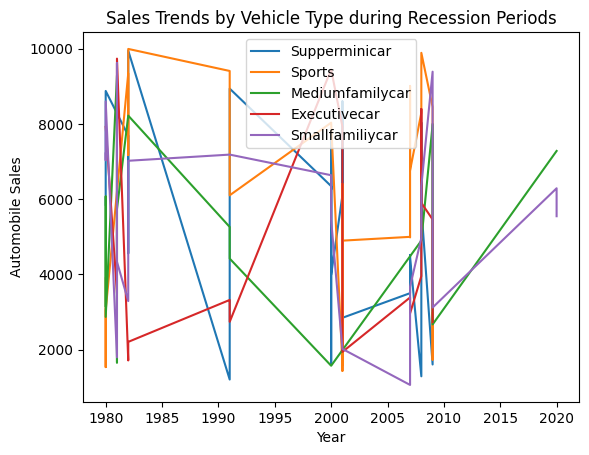

In [30]:
import matplotlib.pyplot as plt

# Plot lines for different vehicle types and recession
recession_df = df[df['Recession'] == 1]
for vehicle_type in df['Vehicle_Type'].unique():
    subset = recession_df[recession_df['Vehicle_Type'] == vehicle_type]
    plt.plot(subset['Year'], subset['Automobile_Sales'], label=vehicle_type)

plt.legend()
plt.title("Sales Trends by Vehicle Type during Recession Periods")
plt.xlabel("Year")
plt.ylabel("Automobile Sales")
plt.show()



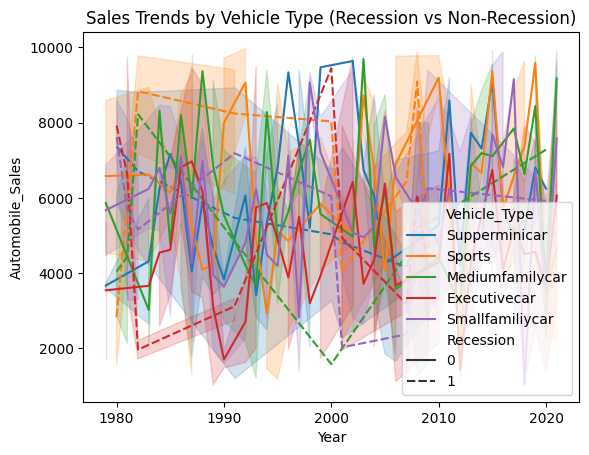

In [31]:
import seaborn as sns

# Recession vs Non-Recession sales trends by Vehicle Type
sns.lineplot(data=df, x='Year', y='Automobile_Sales', hue='Vehicle_Type', style='Recession')
plt.title("Sales Trends by Vehicle Type (Recession vs Non-Recession)")
plt.show()


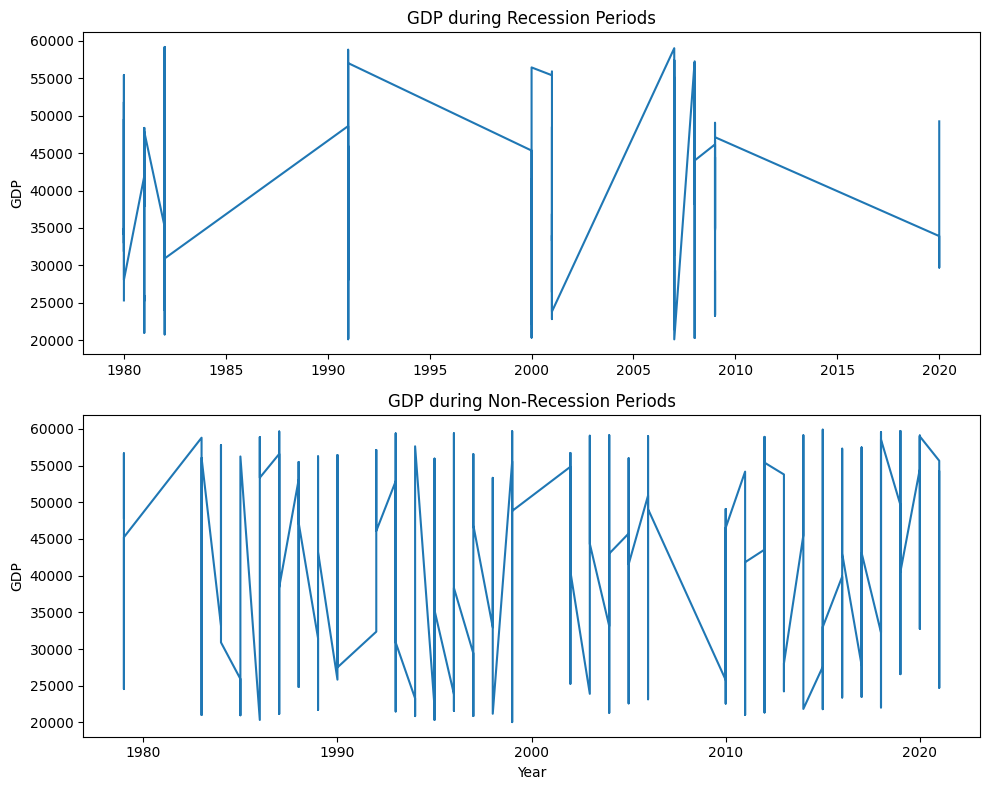

In [32]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Recession Period GDP
recession_gdp = df[df['Recession'] == 1]
ax[0].plot(recession_gdp['Year'], recession_gdp['GDP'])
ax[0].set_title("GDP during Recession Periods")
ax[0].set_ylabel("GDP")

# Non-Recession Period GDP
non_recession_gdp = df[df['Recession'] == 0]
ax[1].plot(non_recession_gdp['Year'], non_recession_gdp['GDP'])
ax[1].set_title("GDP during Non-Recession Periods")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("GDP")

plt.tight_layout()
plt.show()



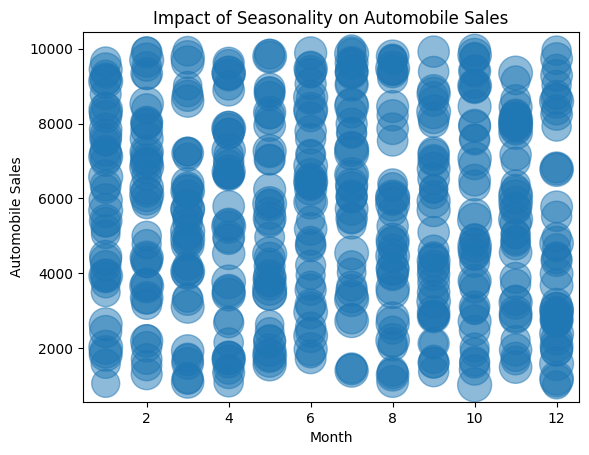

In [33]:
plt.scatter(df['Month'], df['Automobile_Sales'], s=df['Seasonality_Weight']*500, alpha=0.5)
plt.title("Impact of Seasonality on Automobile Sales")
plt.xlabel("Month")
plt.ylabel("Automobile Sales")
plt.show()


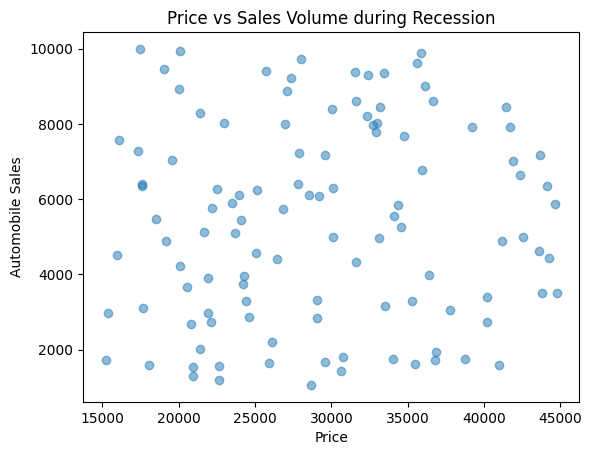

In [34]:
recession_df = df[df['Recession'] == 1]
plt.scatter(recession_df['Price'], recession_df['Automobile_Sales'], alpha=0.5)
plt.title("Price vs Sales Volume during Recession")
plt.xlabel("Price")
plt.ylabel("Automobile Sales")
plt.show()



<Axes: title={'center': 'Advertising Expenditure'}, ylabel='Advertising_Expenditure'>

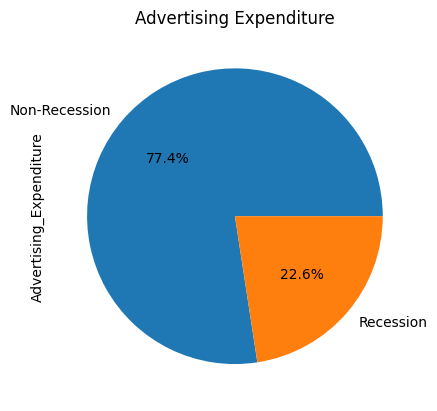

In [35]:
# Recession vs Non-Recession Ad Expenditure
ad_exp_by_recession = df.groupby('Recession')['Advertising_Expenditure'].sum()
ad_exp_by_recession.plot.pie(autopct='%1.1f%%', labels=['Non-Recession', 'Recession'], title="Advertising Expenditure")

# Ad Expenditure by Vehicle Type during Recession




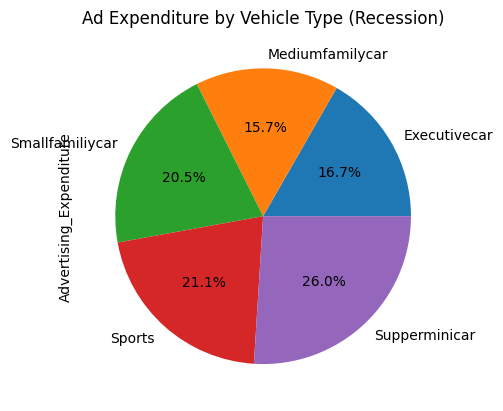

In [36]:
ad_exp_by_type = df[df['Recession'] == 1].groupby('Vehicle_Type')['Advertising_Expenditure'].sum()
ad_exp_by_type.plot.pie(autopct='%1.1f%%', title="Ad Expenditure by Vehicle Type (Recession)")
plt.show()

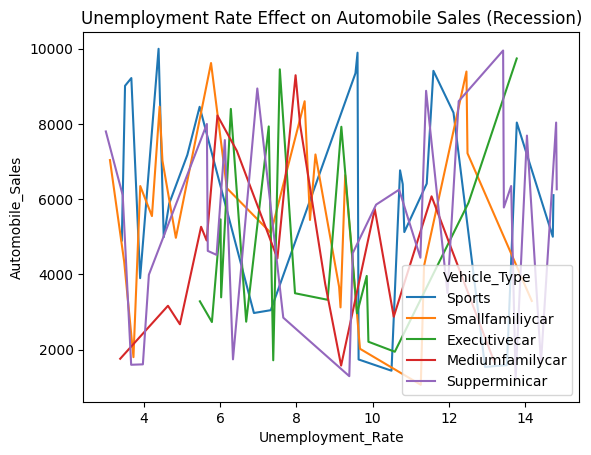

In [37]:
sns.lineplot(data=recession_df, x='Unemployment_Rate', y='Automobile_Sales', hue='Vehicle_Type')
plt.title("Unemployment Rate Effect on Automobile Sales (Recession)")
plt.show()



In [8]:
import dash
from dash import dcc, html

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Automobile Sales Dashboard")
])

if __name__ == '__main__':
    app.run_server(debug=True)


In [3]:
app.layout = html.Div([
    html.H1("Automobile Sales Dashboard"),
    dcc.Dropdown(id='vehicle-type-dropdown', options=[{'label': vt, 'value': vt} for vt in df['Vehicle_Type'].unique()],
                 placeholder="Select Vehicle Type"),
    dcc.Dropdown(id='period-dropdown', options=[{'label': 'Recession', 'value': 'recession'},
                                                {'label': 'Non-Recession', 'value': 'non-recession'}],
                 placeholder="Select Period")
])


In [4]:
app.layout = html.Div([
    html.H1("Automobile Sales Dashboard"),
    dcc.Dropdown(id='vehicle-type-dropdown', options=[{'label': vt, 'value': vt} for vt in df['Vehicle_Type'].unique()],
                 placeholder="Select Vehicle Type"),
    dcc.Dropdown(id='period-dropdown', options=[{'label': 'Recession', 'value': 'recession'},
                                                {'label': 'Non-Recession', 'value': 'non-recession'}],
                 placeholder="Select Period"),
    html.Div(id='output-container')
])


In [5]:
@app.callback(
    dash.dependencies.Output('output-container', 'children'),
    [dash.dependencies.Input('vehicle-type-dropdown', 'value'),
     dash.dependencies.Input('period-dropdown', 'value')]
)
def update_output(vehicle_type, period):
    filtered_data = df[(df['Vehicle_Type'] == vehicle_type) & (df['Recession'] == (period == 'recession'))]
    return f"Displaying data for {vehicle_type} during {period} period"


In [6]:
@app.callback(
    dash.dependencies.Output('recession-graph', 'figure'),
    [dash.dependencies.Input('vehicle-type-dropdown', 'value')]
)
def update_recession_graph(vehicle_type):
    filtered_data = df[(df['Vehicle_Type'] == vehicle_type) & (df['Recession'] == True)]
    figure = {
        'data': [{'x': filtered_data['Year'], 'y': filtered_data['Sales'], 'type': 'line', 'name': vehicle_type}],
        'layout': {'title': f"Recession Report for {vehicle_type}"}
    }
    return figure


In [7]:
@app.callback(
    dash.dependencies.Output('yearly-graph', 'figure'),
    [dash.dependencies.Input('vehicle-type-dropdown', 'value')]
)
def update_yearly_graph(vehicle_type):
    yearly_sales = df[df['Vehicle_Type'] == vehicle_type].groupby('Year').sum()
    figure = {
        'data': [{'x': yearly_sales.index, 'y': yearly_sales['Sales'], 'type': 'line', 'name': vehicle_type}],
        'layout': {'title': f"Yearly Sales for {vehicle_type}"}
    }
    return figure
